# Data Analysis Steps

## 1. Data Exploration
- **Find the dataset size**: Determine the number of rows and columns in the dataset. *(Pandas)*
- **Get column names and data types**: Retrieve the names of all columns and their data types. *(Pandas)*
- **Check for missing values**: Identify if there are any missing values and which columns contain them. *(Pandas)*
- **Remove rows with missing values**: Drop all rows with missing values from the dataset. *(Pandas)*

## 2. Statistics and Calculations
- **Count penguins by species**: Calculate how many penguins there are for each species. *(Pandas)*
- **Analyze beak length**:
  - Find the mean, median, and standard deviation of the beak length for all penguins. *(NumPy)*
- **Calculate correlation**: Compute the correlation between flipper length and body weight. *(NumPy)*

## 3. Creating New Data
- **Convert weights**:
  - Convert body weights from grams to kilograms.
  - Create a distribution plot of weights in kilograms.
  - Add a new column to the DataFrame with the weights in kilograms. *(NumPy, Pandas)*

## 4. Grouping and Data Analysis
- **Penguins by island**: Count the number of penguins on each island and visualize the results using a bar chart. *(Pandas)*
- **Heaviest penguin species**:
  - Determine which penguin species is the heaviest on average.
  - Visualize the result with a bar chart. *(Pandas)*
- **Penguin with the highest weight**:
  - Identify the penguin with the highest weight on each island. *(Pandas)*

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df = pd.read_csv('data/penguins_size.csv')
df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


- **Find the dataset size**: Determine the number of rows and columns in the dataset. *(Pandas)*
- **Get column names and data types**: Retrieve the names of all columns and their data types. *(Pandas)*

In [216]:
# Check the size of the dataset (number of rows and columns)
print(df.shape)  

# Display column names and their data types
print(df.dtypes)

(344, 7)
species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


Check for missing values: Identify if there are any missing values and which columns contain them.

In [217]:
# Method 1: Use `isnull()` to get a boolean DataFrame
missing_values = df.isnull()
missing_values

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [218]:
# Method 2: Filter rows containing NaN using `isna()` and `any(axis=1)`
rows_with_missing_values = df[df.isna().any(axis=1)]
rows_with_missing_values

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [219]:
# Method 3: Use `info()` to get an overview of non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Remove rows with missing values: Drop all rows with missing values from the dataset.

In [220]:
df.dropna(how='any', inplace=True)

In [221]:
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


Count penguins by species: Calculate how many penguins there are for each species.

In [222]:
# Method 1: Use `value_counts()` to count the number of penguins for each species
species_count = df['species'].value_counts()
print(species_count)

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64


In [223]:
# Method 2: Get unique species and count manually
penguins_type = df['species'].unique()
# Output: array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

# Loop through each species and count its occurrences
for species in penguins_type:
    count_true = (df['species'] == species).sum()
    print(f"Количество 'True' для {species}: {count_true}")

Количество 'True' для Adelie: 146
Количество 'True' для Chinstrap: 68
Количество 'True' для Gentoo: 120


Find the mean, median, and standard deviation of the beak length for all penguins.

In [224]:
culmen_length = np.array(df['culmen_length_mm'], dtype=np.float64)

print("Mean: " + str(culmen_length.mean()))
print("Median: " + str(np.median(culmen_length)))
print("Median: " + str(np.std(culmen_length)))


Mean: 43.99431137724551
Median: 44.5
Median: 5.452340922189911


In [225]:
# Alternatively, we can calculate these values in a single command using Pandas' describe()
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


Calculate correlation: Compute the correlation between flipper length and body weight.

[[1.         0.87321097]
 [0.87321097 1.        ]]


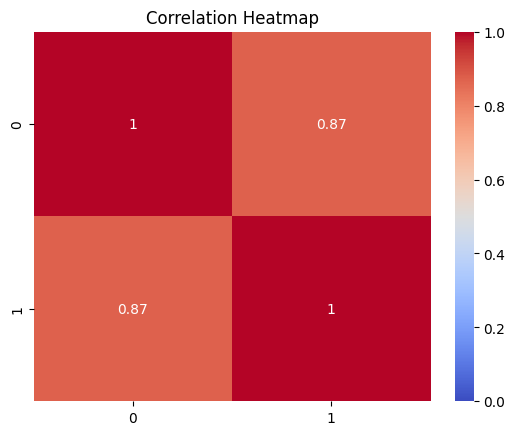

In [226]:
# Convert the data columns to NumPy arrays
flipper_length = np.array(df['flipper_length_mm'], dtype=np.float64)
body_mass_g = np.array(df['body_mass_g'], dtype=np.float64)

# Calculate the correlation coefficient matrix
corr = np.corrcoef(flipper_length, body_mass_g)
print(corr)

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr, vmin=0, vmax=1, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Convert weights:
 - Convert body weights from grams to kilograms.
 - Create a distribution plot of weights in kilograms.
 - Add a new column to the DataFrame with the weights in kilograms. (NumPy, Pandas + Seaborn)

[3.75  3.8   3.25  3.45  3.65  3.625 4.675 3.2   3.8   4.4   3.7   3.45
 4.5   3.325 4.2   3.4   3.6   3.8   3.95  3.8   3.8   3.55  3.2   3.15
 3.95  3.25  3.9   3.3   3.9   3.325 4.15  3.95  3.55  3.3   4.65  3.15
 3.9   3.1   4.4   3.    4.6   3.425 3.45  4.15  3.5   4.3   3.45  4.05
 2.9   3.7   3.55  3.8   2.85  3.75  3.15  4.4   3.6   4.05  2.85  3.95
 3.35  4.1   3.05  4.45  3.6   3.9   3.55  4.15  3.7   4.25  3.7   3.9
 3.55  4.    3.2   4.7   3.8   4.2   3.35  3.55  3.8   3.5   3.95  3.6
 3.55  4.3   3.4   4.45  3.3   4.3   3.7   4.35  2.9   4.1   3.725 4.725
 3.075 4.25  2.925 3.55  3.75  3.9   3.175 4.775 3.825 4.6   3.2   4.275
 3.9   4.075 2.9   3.775 3.35  3.325 3.15  3.5   3.45  3.875 3.05  4.
 3.275 4.3   3.05  4.    3.325 3.5   3.5   4.475 3.425 3.9   3.175 3.975
 3.4   4.25  3.4   3.475 3.05  3.725 3.    3.65  4.25  3.475 3.45  3.75
 3.7   4.    3.5   3.9   3.65  3.525 3.725 3.95  3.25  3.75  4.15  3.7
 3.8   3.775 3.7   4.05  3.575 4.05  3.3   3.7   3.45  4.4   3.6  

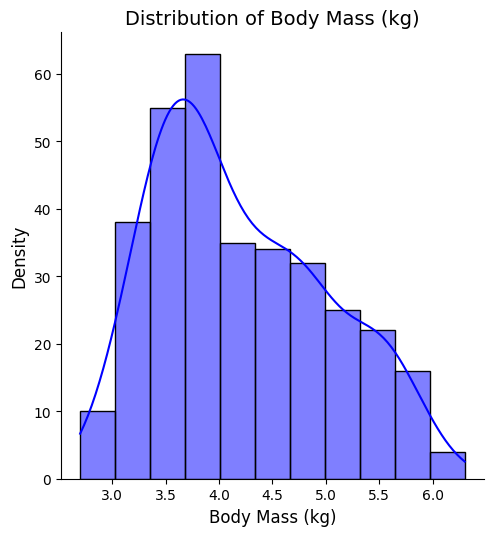

In [227]:
# Convert body mass from grams to kilograms
mass_g = np.array(df['body_mass_g'], dtype=np.float64)
mass_kg = mass_g / 1000

# Display the converted array
print(mass_kg)

# Visualize the distribution of body mass in kilograms
sns.displot(mass_kg, kde=True, color='b')

# Add title and labels for better visualization
plt.title('Distribution of Body Mass (kg)', fontsize=14)
plt.xlabel('Body Mass (kg)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()


In [228]:
# Add the converted data as a new column in the DataFrame
df['body_mass_kg'] = mass_kg
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,3.750
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,3.800
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,3.250
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,3.450
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,3.650
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,4.925
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,4.850
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,5.750
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,5.200


Penguins by island: Count the number of penguins on each island and visualize the results using a bar chart. (Pandas + Seaborn)

     species     island  count
0     Adelie      Dream     55
1     Adelie  Torgersen     47
2     Adelie     Biscoe     44
3  Chinstrap      Dream     68
4     Gentoo     Biscoe    120


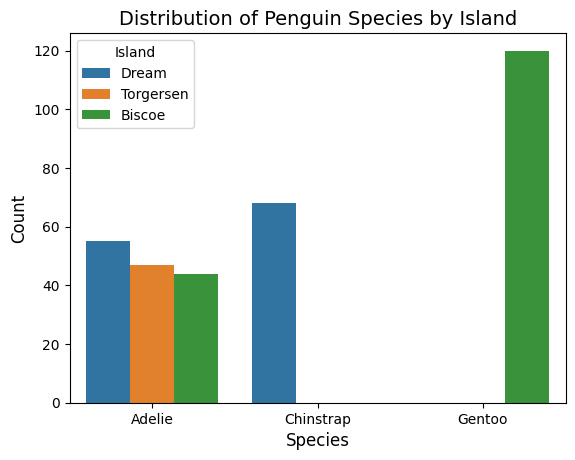

In [229]:
# Group data by species and island, and count the occurrences
grouped_counts = df.groupby('species')['island'].value_counts().reset_index(name='count')
print(grouped_counts)

# Create a bar plot to visualize the counts
sns.barplot(x='species', y='count', hue='island', data=grouped_counts)

# Add title and axis labels for better interpretation
plt.title('Distribution of Penguin Species by Island', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate the legend labels for better readability if necessary
plt.legend(title='Island', fontsize=10)

# Display the plot
plt.show()

Heaviest penguin species: Determine which penguin species is the heaviest on average. Visualize the result with a bar chart. (Pandas + Seaborn)

     species  max_weight
0     Adelie       4.775
1  Chinstrap       4.800
2     Gentoo       6.300


/var/folders/z3/bqrtqxgx1_jdzdzpsjz6y0tm0000gn/T/ipykernel_36483/366113267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='max_weight', data=grouped_heavy, palette='viridis')


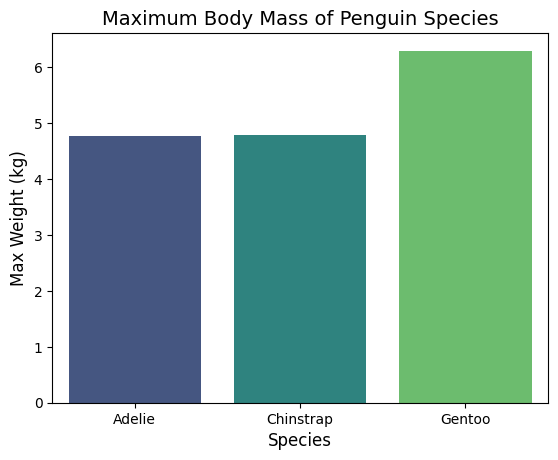

In [230]:
# Group data by species and find the maximum body mass in kilograms
grouped_heavy = df.groupby('species')['body_mass_kg'].max().reset_index(name='max_weight')
print(grouped_heavy)

# Create a bar plot to visualize the maximum body mass for each species
sns.barplot(x='species', y='max_weight', data=grouped_heavy, palette='viridis')

# Add title and axis labels for clarity
plt.title('Maximum Body Mass of Penguin Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Max Weight (kg)', fontsize=12)

# Customize the y-axis ticks for better readability
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

# Display the plot
plt.show()

Penguin with the highest weight: Identify the penguin with the highest weight on each island.

      island  island_heavy
0     Biscoe           6.3
1      Dream           4.8
2  Torgersen           4.7


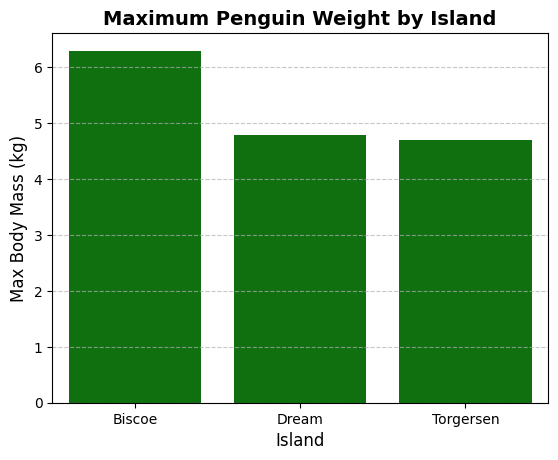

In [231]:
# Group data by island and find the maximum body mass in kilograms
grouped_island_heavy = df.groupby('island')['body_mass_kg'].max().reset_index(name='island_heavy')
print(grouped_island_heavy)

# Create a bar plot for the heaviest penguin on each island
sns.barplot(x='island', y='island_heavy', data=grouped_island_heavy, color='g')

# Enhance the plot with titles and labels
plt.title('Maximum Penguin Weight by Island', fontsize=14, fontweight='bold')
plt.xlabel('Island', fontsize=12)
plt.ylabel('Max Body Mass (kg)', fontsize=12)

# Improve axis ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()